<a href="https://colab.research.google.com/github/sofipop/Simulaci-n_I/blob/main/Monte_Carlo_de_Acierto_y_Error_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo de Acierto y Error


Es una técnica probabilística utilizada para estimar el valor de una integral definida.  
Se basa en generar puntos aleatorios dentro de un rectángulo que encierra la función y contar cuántos de ellos caen por debajo de la curva de la función f(x).  

La estimación de la integral se realiza mediante la siguiente fórmula:

$$
I \approx \frac{N_{\text{debajo}}}{N_{\text{total}}} \times \text{Área del rectángulo}
$$

Donde:
- $N_{\text{debajo}}$ es el número de puntos que caen bajo la curva $f(x)$.
- $N_{\text{total}}$ es el número total de puntos generados aleatoriamente.
- $\text{Área del rectángulo} = (b-a) \times M$, donde $M$ es un valor tal que $f(x) \leq M$ para todo $x$ en el intervalo $[a, b]$.

El error de la estimación se puede calcular como:

$$
\text{Error} \approx \frac{\sqrt{N_{\text{debajo}} (1 - p)}}{N_{\text{total}}} \times \text{Área del rectángulo}
$$

donde $p = \frac{N_{\text{debajo}}}{N_{\text{total}}}$.

Este método es útil para estimar integrales de funciones complejas sin necesidad de resolverlas analíticamente.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sqrt(np.arctan(x))

#límites de integración
a=0
b=1

#Corrección:Usamos el valor máximo correcto de f(x) en [a, b]
M=f(1) #f(1)=sqrt(arctan(1))=sqrt(pi/4)
#puntos aleatorios
N_total=10000

#puntos aleatorios dentro del rectángulo [a,b] × [0,M]
x_rand=np.random.uniform(a, b, N_total)
y_rand=np.random.uniform(0, M, N_total)

#Contamos los puntos que están debajo de la curva f(x)
N_debajo=np.sum(y_rand<=f(x_rand))

#Calculamos la estimación de la integral
area_rectangulo = (b - a) * M
integral_estimada = (N_debajo / N_total) * area_rectangulo

In [6]:
#error
p=N_debajo / N_total
error_estimado = np.sqrt(N_debajo * (1 - p)) / N_total * area_rectangulo

In [5]:
#Mostramos los resultados
print(f"Estimación de la integral: {integral_estimada:.6f}")
print(f"Error estimado: {error_estimado:.6f}")

Estimación de la integral: 0.620270
Error estimado: 0.004062


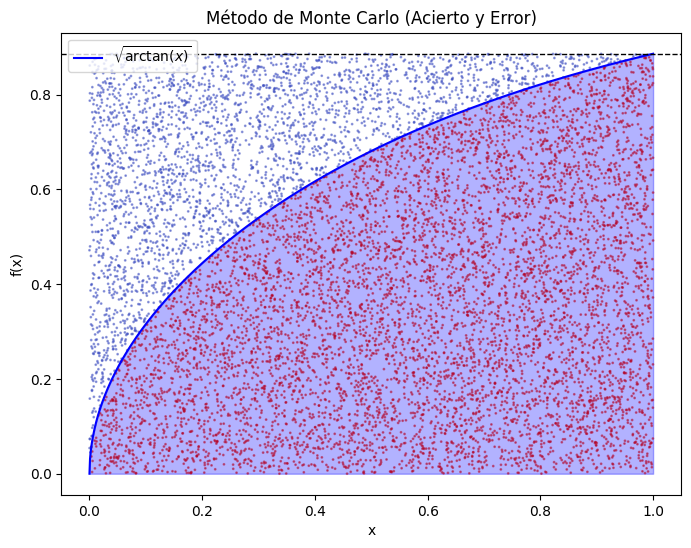

In [9]:

#gráfica
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), color="blue", label=r"$\sqrt{\arctan(x)}$")
plt.fill_between(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), color="blue", alpha=0.3)

# Puntos Monte Carlo
plt.scatter(x_rand, y_rand, c=(y_rand <= f(x_rand)), cmap="coolwarm", s=1, alpha=0.5)
plt.axhline(M, color="black", linestyle="dashed", linewidth=1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Método de Monte Carlo (Acierto y Error)")
plt.legend()
plt.show()